# Pratik Kadam TSF-GRIP
#### Task 2 : Prediction using Unsupervised ML

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


### Loading Dataset

In [2]:
df = pd.read_csv(r"D:\Spark Foundation Internship\Task2 (iris)\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_copy = df

### EDA

In [4]:
df = df.drop(['Id','Species'],axis=1)

#### Missing/Null Values

In [5]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### Checking Outliers

<Axes: >

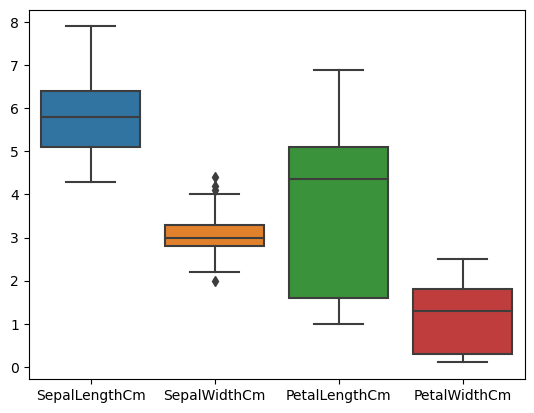

In [6]:
import seaborn as sns
sns.boxplot(data=df)

In [7]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(upper=ul,lower=ll,inplace=True)
        

<Axes: >

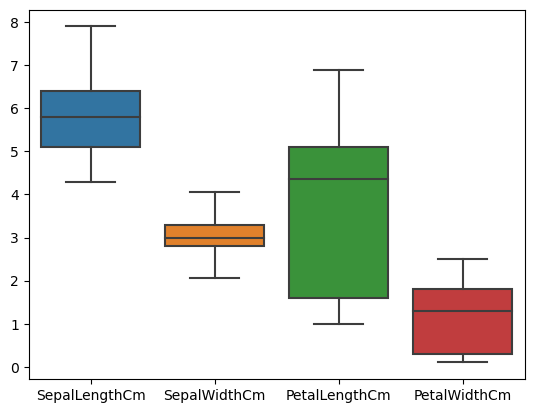

In [8]:
import seaborn as sns
sns.boxplot(data=df)

* outliers removed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
samples = df.values
samples

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.05, 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

### Model Building

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
km = KMeans(random_state=42)

In [15]:
visualizer = KElbowVisualizer(km, k=(1,10))

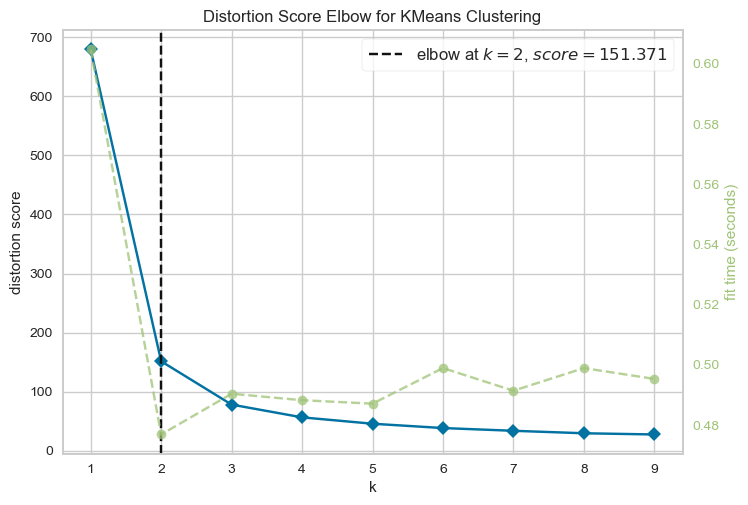

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer.fit(samples)       
visualizer.show()

In [17]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [18]:
df['Cluster_Made'] = model2.fit_predict(samples)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Made
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [19]:
model2.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.407     , 1.464     , 0.244     ],
       [5.9016129 , 2.74919355, 4.39354839, 1.43387097]])

In [20]:
df.Cluster_Made.value_counts(ascending=False)

2    62
1    50
0    38
Name: Cluster_Made, dtype: int64

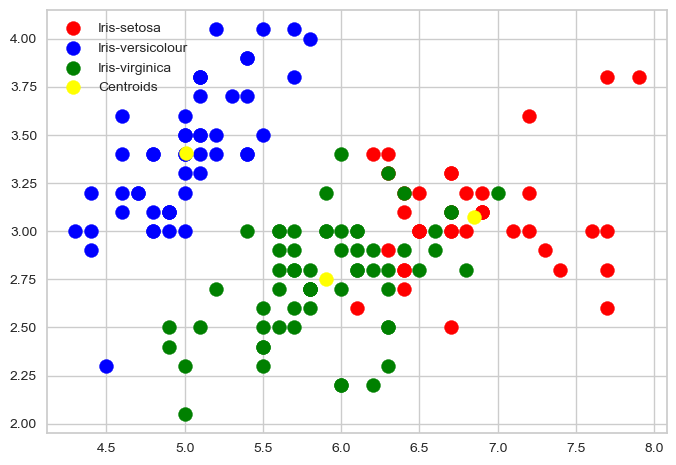

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(samples[df['Cluster_Made'] == 0, 0], samples[df['Cluster_Made'] == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(samples[df['Cluster_Made'] == 1, 0], samples[df['Cluster_Made'] == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(samples[df['Cluster_Made'] == 2, 0], samples[df['Cluster_Made'] == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### END